**Loading Iris.csv**

In [ ]:
! pip install plotly --upgrade
! pip install kneed

In [67]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [39]:
import pandas as pd
base= pd.read_csv('../sample-data/Iris.csv', sep=',')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
# drop class column
X = base.iloc[:, 0:4].values
X.shape

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

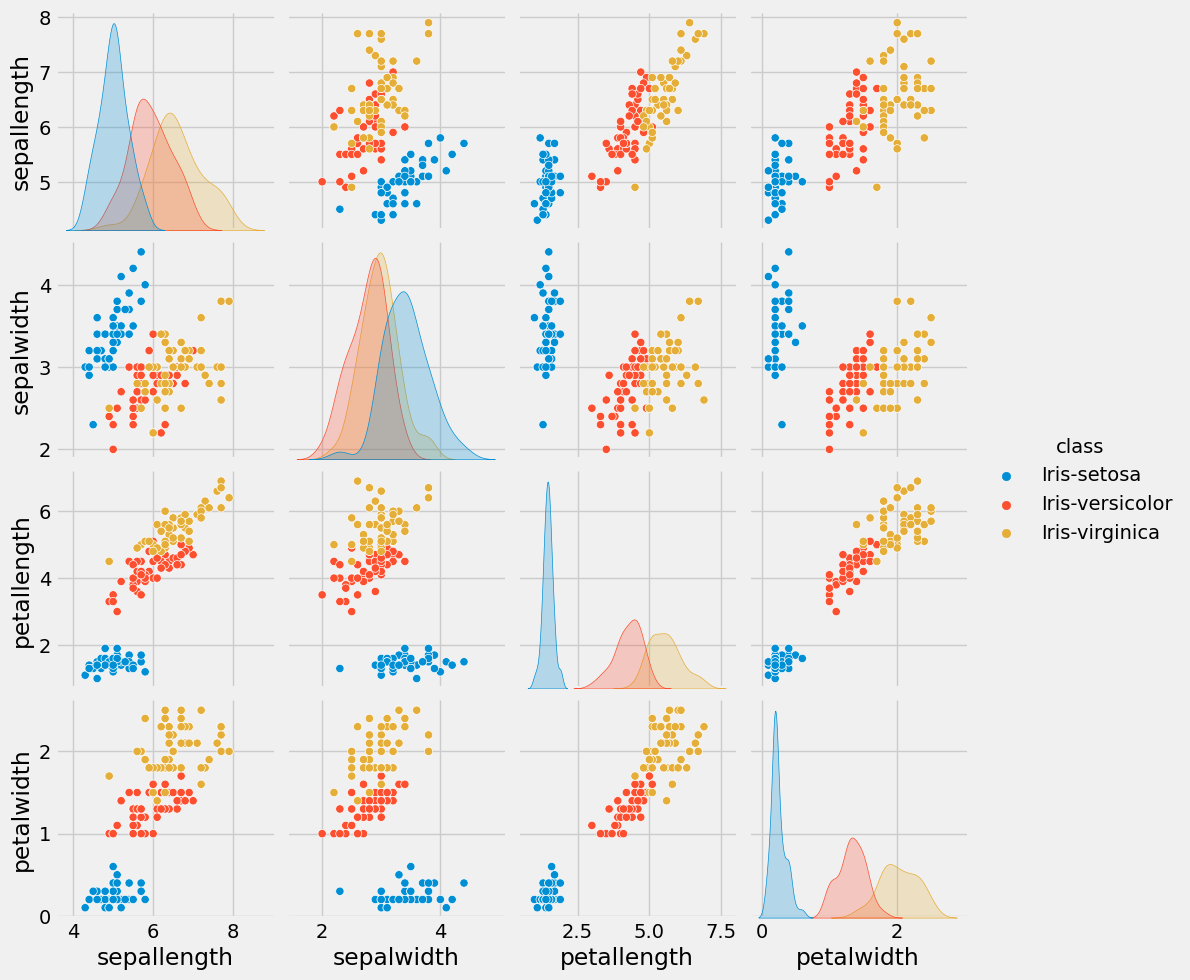

In [59]:
sns.pairplot(base,hue='class')

**K-means**

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
saida_kmeans = kmeans.fit_predict(X)

C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
# adding k-means column to dataset
kmeans.fit(X)
kmeans.labels_
base['k-class'] = kmeans.labels_

C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
base

,sepallength,sepalwidth,petallength,petalwidth,class,k-class
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

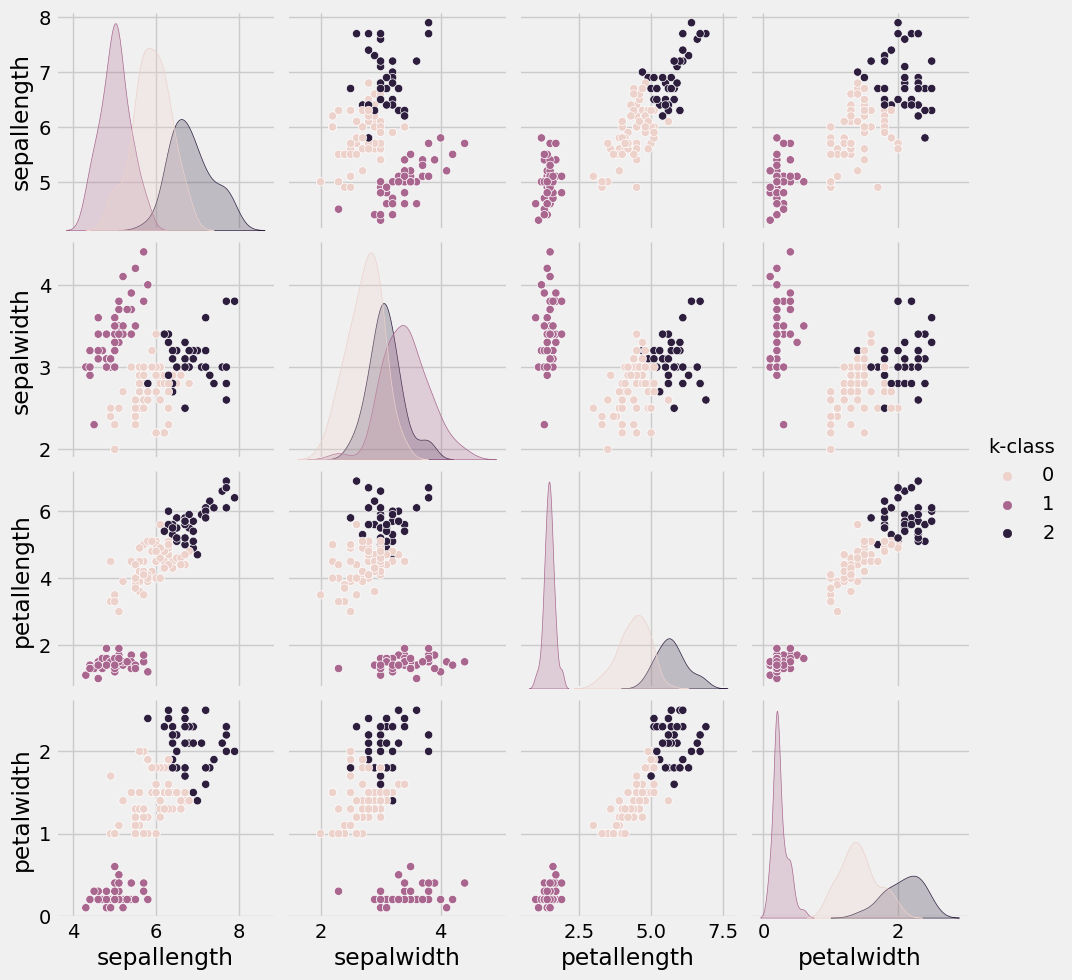

In [63]:
sns.pairplot(base,hue='k-class')

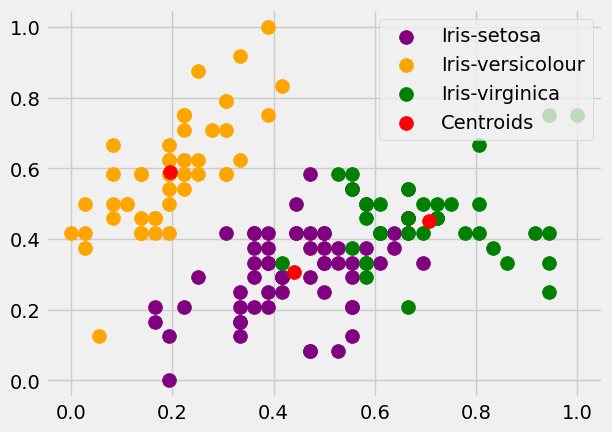

In [53]:
plt.scatter(X[saida_kmeans == 0, 0], X[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[saida_kmeans == 1, 0], X[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[saida_kmeans == 2, 0], X[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

**Silhouette**

In [43]:
limit = int((X.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.354
Silhouette Score k = 6: 0.355
Silhouette Score k = 7: 0.346
Silhouette Score k = 8: 0.330


C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

the best score (0.629) is when k = 2 -> this dataset has 3 classes, meaning that silhouette wasn't able to group all classes

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
saida_kmeans = kmeans.fit_predict(X)

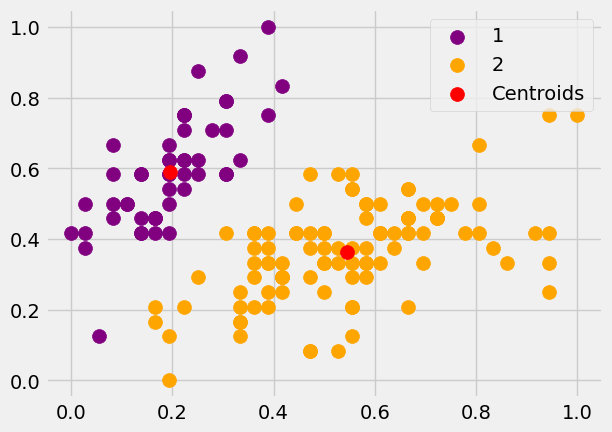

In [45]:
plt.scatter(X[saida_kmeans == 0, 0], X[saida_kmeans == 0, 1], s = 100, c = 'purple', label = '1')
plt.scatter(X[saida_kmeans == 1, 0], X[saida_kmeans == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

**Elbow**

In [ ]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

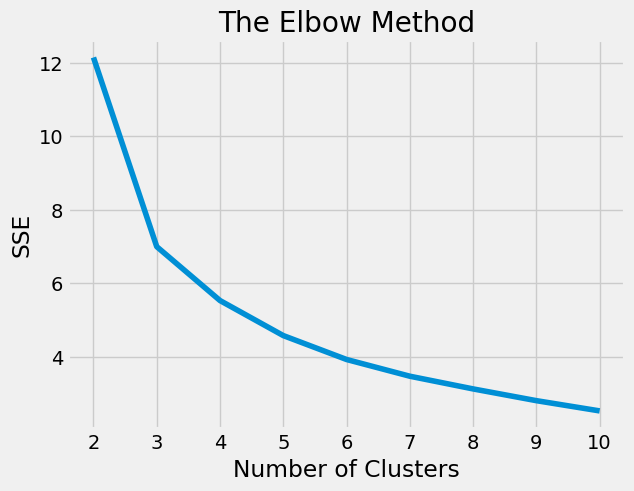

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

the elbow is in 4, meaning that the best number of clusters is 4 -> this dataset has 3 classes

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
saida_kmeans = kmeans.fit_predict(X)

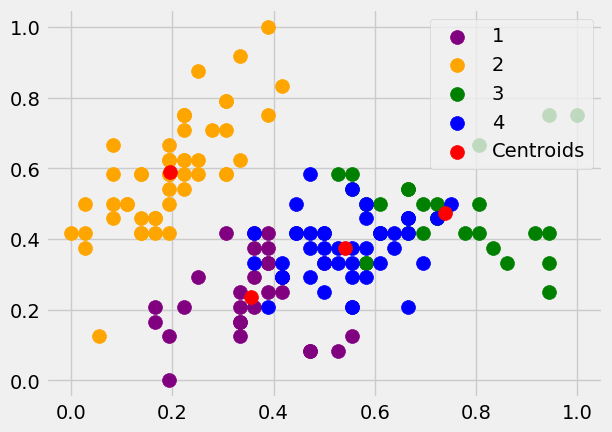

In [50]:
plt.scatter(X[saida_kmeans == 0, 0], X[saida_kmeans == 0, 1], s = 100, c = 'purple', label = '1')
plt.scatter(X[saida_kmeans == 1, 0], X[saida_kmeans == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(X[saida_kmeans == 2, 0], X[saida_kmeans == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[saida_kmeans == 3, 0], X[saida_kmeans == 3, 1], s = 100, c = 'blue', label = '4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

**Calinski-Harabasz**

higher score indicates better clustering

In [68]:
from sklearn.metrics import calinski_harabasz_score
# limit = int((X.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = calinski_harabasz_score(X, pred)
    print('Calisnski Harabasz Score k = {}: {:<.3f}'.format(k, score))

Calisnski Harabasz Score k = 2: 353.367
Calisnski Harabasz Score k = 3: 358.567
Calisnski Harabasz Score k = 4: 313.184
Calisnski Harabasz Score k = 5: 289.806
Calisnski Harabasz Score k = 6: 273.764
Calisnski Harabasz Score k = 7: 258.993
Calisnski Harabasz Score k = 8: 245.677


C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

highest score -> k = 3: 358.567

**Davies-Bouldin**

lower score indicates better clustering

In [69]:
from sklearn.metrics import davies_bouldin_score
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    pred = model.predict(X)
    score = davies_bouldin_score(X, pred)
    print('Davies Bouldin Score k = {}: {:<.3f}'.format(k, score))

Davies Bouldin Score k = 2: 0.488
Davies Bouldin Score k = 3: 0.761
Davies Bouldin Score k = 4: 0.901
Davies Bouldin Score k = 5: 0.961
Davies Bouldin Score k = 6: 0.976
Davies Bouldin Score k = 7: 1.055
Davies Bouldin Score k = 8: 1.048


C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

lowest score -> k = 2: 0.488